In [1]:
import pandas as pd
import numpy as np
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Selecionando os setores de Alta Densidade Demográfica 
Objetivo: filtrar a Mancha Urbana Principal

In [2]:
roi = gpd.read_file(filename='../MG_Setores_2021/MG_Setores_2021.shp')

In [3]:
roi_sj = roi.loc[(roi['NM_MUN'] == "São João del Rei") &
                 (roi['NM_DIST'] == 'São João del Rei') &
                 (roi['NM_SIT'] == 'Área Urbana de Alta Densidade de Edificações')]

<AxesSubplot:>

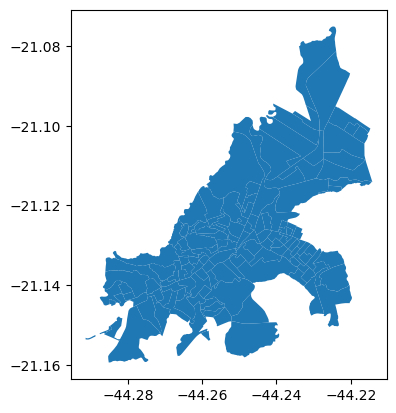

In [4]:
roi_sj.plot()

### Obtendo o Grafo com as propriedades de intresse

In [5]:
#unindo as geometrias que compõem a roi para funcionar na ox
polygon = roi_sj.unary_union

G = ox.graph.graph_from_polygon(polygon,
                              network_type = 'drive')

In [10]:
#salvando o grafo
ox.io.save_graphml(G, filepath='grafoSJDR.graphml', gephi=False, encoding='utf-8')

In [6]:
len(G.nodes)

2501

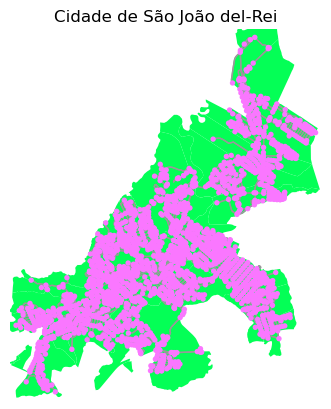

In [7]:
ax= roi_sj.plot(color = '#04ff56')
plt.title("Cidade de São João del-Rei")
ax = ox.plot_graph(G, ax = ax, node_color = '#fa77ff')

### Adicionando propriedades a G

In [9]:
#como houve o fitlro pelo perimetro urbano, assume-se que todas as vias
#sem dados serão 'vias locais', cuja velocidade mázima é 30 km/h de acordo com o CTB

G = ox.routing.add_edge_speeds(G,
    hwy_speeds=None,
    fallback=30,
    agg=np.min)


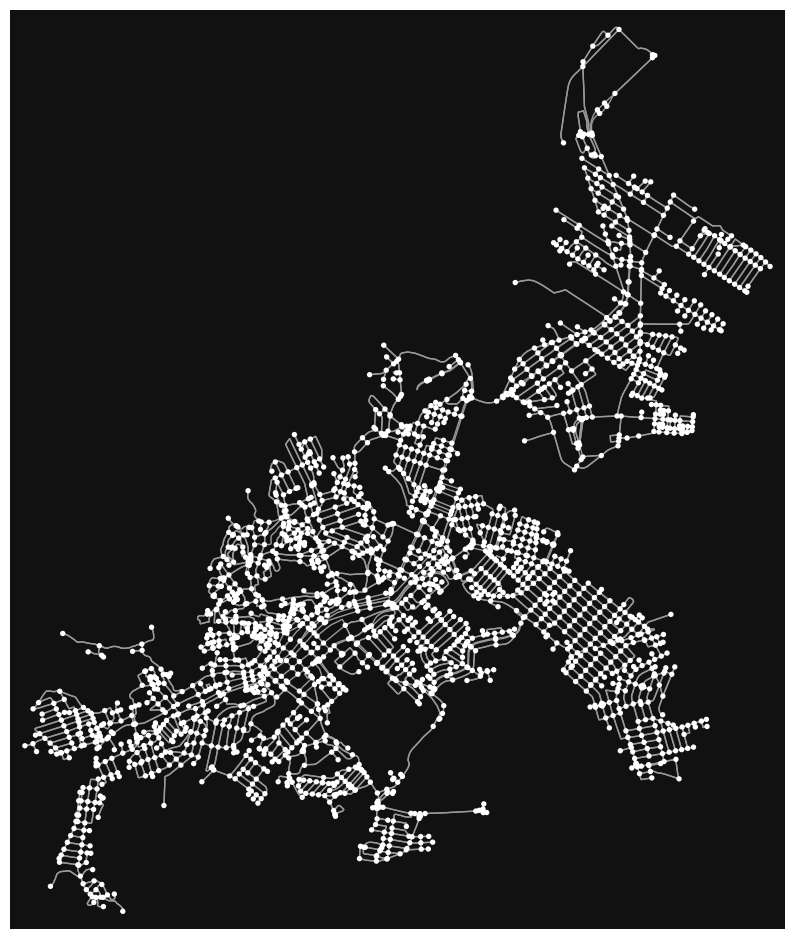

In [14]:
fig, ax = ox.plot_graph(G, show=False, close=False, figsize = (10, 12))
#plt.title("São João del Rei", size='x-large', color='#ffffff')

plt.savefig('plotGrafoSJDR.png')
plt.show()



In [15]:
stats_network = ox.stats.basic_stats(G)

### Explorando um pouco das propriedades do grafo

In [19]:
for u,v, data in G.edges(data=True):
    print(f"{u},{v}, {data}")
    break
    

410697293,3215586596, {'osmid': 667233170, 'oneway': True, 'ref': 'BR-383', 'highway': 'primary', 'reversed': False, 'length': 138.035, 'geometry': <LINESTRING (-44.23 -21.086, -44.23 -21.087, -44.23 -21.087, -44.231 -21.087...>, 'speed_kph': 30.0}


In [ ]:
for u,v, data in G.edges(data=True):
    #print(f"{u},{v}, {data['length']}, {data['speed_kph']}, {data['osmid']} ")
    try:
        print(u,v, data['name'])
    except: 
        print(u,v, data)

In [21]:
velocidades = []
for u,v, i in G.edges(data=True):
    velocidades.append(i['speed_kph'])